In [39]:
from job_shop_lib.benchmarking import load_benchmark_instance

ta01 = load_benchmark_instance("ta01")

In [40]:
ta01.metadata

{'optimum': 1231,
 'upper_bound': 1231,
 'lower_bound': 1231,
 'reference': "E. Taillard. 'Benchmarks for basic scheduling problems', European Journal of Operational Research, Vol. 64, Issue 2, pp. 278-285, 1993."}

In [41]:
jobs = ta01.jobs
num_machines = ta01.num_machines
num_jobs = ta01.num_jobs

print("Number of jobs:", num_jobs)
print("Number of machines:", num_machines)

Number of jobs: 15
Number of machines: 15


In [42]:
import numpy as np
np.random.seed(0)
num_jobs = ta01.num_jobs
num_machines = ta01.num_machines
print(f"Number of jobs: {num_jobs}, Number of machines: {num_machines}")

# [-5, 5] の一様乱数で初期化
initial_population = np.random.uniform(-5, 5, num_jobs * num_machines)
print("Initial population values:\n", initial_population)

# シーケンス番号に変換：値が小さい順に1から番号を振る
initial_sequence = np.argsort(np.argsort(initial_population)) + 1
print("Initial sequence based on population va)lues:\n", initial_sequence)

# シーケンス番号をジョブ番号に変換
job_sequence = initial_sequence % num_jobs + 1
print("Job sequence based on initial population:\n", job_sequence)

# (ジョブ番号, 同一ジョブ番号での登場順) のタプルに変換
job_sequence_tuples = []
job_count = [-1] * num_jobs
for job_num in job_sequence:
    job_count[job_num - 1] += 1
    job_sequence_tuples.append((job_num-1, job_count[job_num - 1]))
print("Job sequence tuples:\n", job_sequence_tuples)

Number of jobs: 15, Number of machines: 15
Initial population values:
 [ 0.48813504  2.15189366  1.02763376  0.44883183 -0.76345201  1.45894113
 -0.62412789  3.91773001  4.63662761 -1.16558481  2.91725038  0.2889492
  0.68044561  4.25596638 -4.28963942 -4.128707   -4.79781603  3.32619846
  2.78156751  3.70012148  4.78618342  2.99158564 -0.38520638  2.80529176
 -3.81725574  1.39921021 -3.56646713  4.44668917  0.21848322 -0.8533806
 -2.35444388  2.74233689 -0.43849668  0.68433949 -4.812102    1.17635497
  1.12095723  1.16933997  4.43748079  1.81820299 -1.40492099 -0.62968046
  1.97631196 -4.39774528  1.66766715  1.7063787  -2.89617439 -3.71073702
 -1.84571649 -1.36289229  0.7019677  -0.61398487  4.88373838 -3.97955189
 -2.91123244 -3.38690482  1.53108325 -2.46708397 -0.33689227 -2.55574408
 -3.41030416 -3.89624859  1.56329589 -3.61817049 -3.03417638 -1.31274829
  3.2099323  -4.02898724  3.37944907 -4.03901592  4.76459465 -0.31348798
  4.76761088  1.0484552   2.39263579 -4.60812208 -2.171

In [43]:
instances = ta01

from job_shop_lib.dispatching import Dispatcher

dispatcher = Dispatcher(instances)

for i, j in job_sequence_tuples:
    dispatcher.dispatch(jobs[i][j], jobs[i][j].machine_id)

In [44]:
dispatcher.schedule.makespan()

2527

In [45]:
from job_shop_lib import JobShopInstance, Operation
import numpy as np

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(
    jobs,
    name="Example"
)

times = np.array(instance.durations_matrix)
machines = np.array(instance.machines_matrix)

print("Processing Times:\n", times)
print("Machines:\n", machines)

Processing Times:
 [[1 1 7]
 [5 1 1]
 [1 3 2]]
Machines:
 [[0 1 2]
 [1 2 0]
 [2 0 1]]


In [20]:
import numpy as np
np.random.seed(0)
num_jobs = len(jobs)
num_machines = 3
print(f"Number of jobs: {num_jobs}, Number of machines: {num_machines}")

# [-5, 5] の一様乱数で初期化
initial_population = np.random.uniform(-5, 5, num_jobs * num_machines)
print("Initial population values:\n", initial_population)

# シーケンス番号に変換：値が小さい順に1から番号を振る
initial_sequence = np.argsort(np.argsort(initial_population)) + 1
print("Initial sequence based on population va)lues:\n", initial_sequence)

# シーケンス番号をジョブ番号に変換
job_sequence = initial_sequence % num_jobs + 1
print("Job sequence based on initial population:\n", job_sequence)

# (ジョブ番号, 同一ジョブ番号での登場順) のタプルに変換
job_sequence_tuples = []
job_count = [-1] * num_jobs
for job_num in job_sequence:
    job_count[job_num - 1] += 1
    job_sequence_tuples.append((job_num-1, job_count[job_num - 1]))
print("Job sequence tuples:\n", job_sequence_tuples)



Number of jobs: 3, Number of machines: 3
Initial population values:
 [ 0.48813504  2.15189366  1.02763376  0.44883183 -0.76345201  1.45894113
 -0.62412789  3.91773001  4.63662761]
Initial sequence based on population va)lues:
 [4 7 5 3 1 6 2 8 9]
Job sequence based on initial population:
 [2 2 3 1 2 1 3 3 1]
Job sequence tuples:
 [(np.int64(1), 0), (np.int64(1), 1), (np.int64(2), 0), (np.int64(0), 0), (np.int64(1), 2), (np.int64(0), 1), (np.int64(2), 1), (np.int64(2), 2), (np.int64(0), 2)]


In [21]:
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

In [22]:
from job_shop_lib.dispatching import Dispatcher

dispatcher = Dispatcher(instance)

for i, j in job_sequence_tuples:
    dispatcher.dispatch(jobs[i][j], jobs[i][j].machine_id)

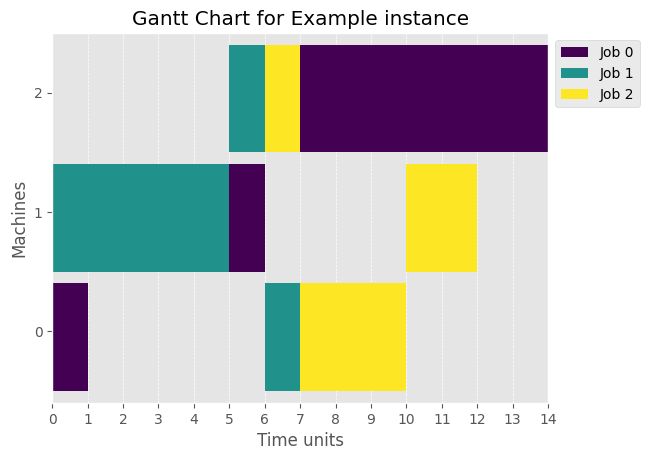

In [23]:
from job_shop_lib.visualization.gantt import plot_gantt_chart
import matplotlib.pyplot as plt

plt.style.use("ggplot")

_ = plot_gantt_chart(dispatcher.schedule)

In [25]:
# makespanを計算
makespan = dispatcher.schedule.makespan()
print("Makespan of the schedule:", makespan)

Makespan of the schedule: 14
